# My Project Title

## Introduction
I will analyze some life style and academic habits and how they may impact a student's final exam score.

## Analysis
### Importing
I imported the data from a CSV file that I downloaded from Kaggle. It contains various pieces of information regarding factors that may impact the success of a student on a course's final evaluation. Each row represents a different student participating a course, and each column has different information about the students, one of which is the final exam score for the course the student is taking. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("StudentPerformanceFactors.csv")
# Creating a data frame using the data set imported from the StudentPerformanceFactors.csv file, and assigning it to a variable called 'data'

### Cleaning Data and Manipulation
The data set didn't have any missing values so I didn't have to clean any missing values out of the dataset. There is a lot of extra columns that I won't need for my analysis so I'll remove them from the data frame that I'm working with. I've decided to explore the relationship between previous exam scores and motivation level, as well as how the two impact final exam scores.

In [2]:
data = data.reindex(['Previous_Scores','Motivation_Level','Exam_Score'],axis=1)
# Removing unneeded columns and reording them
data.columns = ['Previous Exam Score', 'Motivation Level', 'Final Exam Score']
# Renaming the columns to have cleaner names


#### *About the Columns*
- **Previous Scores** is the score a student received on a previous exam
- **Motivation Level** is how motivated a student felt to work in the course described by Low/Medium/High
- **Exam Score** is the score the student received on a final exam

I'd like to add a columns to the dataframe that contain what percentage range [50-59,60-69,70-79,80-89,90-100] each student's previous and curent exam score falls into. This way, I can more easily display my data grouped into percentage ranges later on, rather than have bars for every unique score.
<br>
- **Previous Exam Score Grouping** percentage grouping of previous exam score
- **Final Exam Score Grouping** percentage grouping of final exam score

In [3]:

data['Previous Exam Score Grouping'] = (data.loc[:]['Previous Exam Score'] // 10) * 10
# Creating a new column that contains the percentage grouping that the student's previous exam score falls into
data['Final Exam Score Grouping'] = (data.loc[:]['Final Exam Score'] // 10) * 10
# Creating a new column that contains the percentage grouping that the student's exam score falls into
display(data)

,Previous Exam Score,Motivation Level,Final Exam Score,Previous Exam Score Grouping,Final Exam Score Grouping
0,73,Low,67,70,60
1,59,Low,61,50,60
2,91,Medium,74,90,70
3,98,Medium,71,90,70
4,65,Medium,70,60,70
...,...,...,...,...,...
6602,76,Medium,68,70,60
6603,81,Medium,69,80,60
6604,65,Low,68,60,60
6605,91,High,68,90,60


### Exploratory Data Analysis
Now that the data is simplified and ready to work with, I can start by exploring a relationship between a student's previous exam score and their current motivation level for their course.

#### *Exploring a Relationship Between Previous Exam Score and Student Motivation*
First I'll generate a bar graph to depict how many students fell into each motivation category. Each motivation category is further broken down to count how many students are within each previous exam score grouping.

<Axes: title={'center': 'Distribution of Motivation Levels of Students'}, xlabel='Motivation Level', ylabel='Number of Students'>

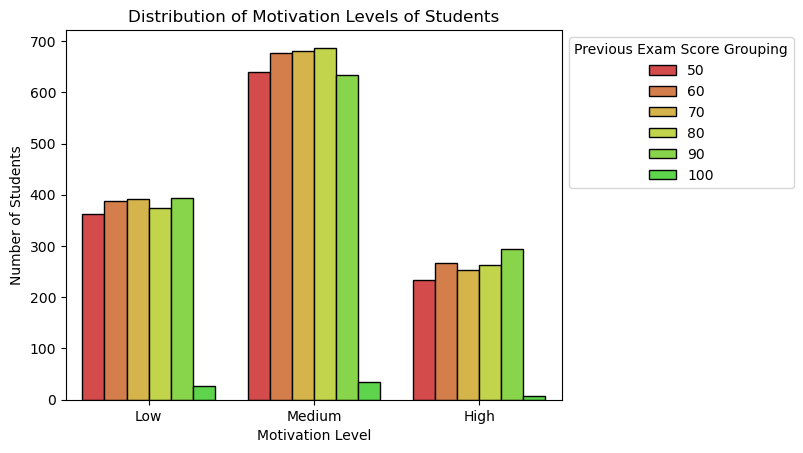

In [ ]:
motivationCountPlot = sns.countplot(data=data, x='Motivation Level', 
                                    palette=['#eb3434','#eb7a34','#ebc034','#d3eb34','#86eb34','#4ceb34'], 
                                    edgecolor='black', 
                                    hue='Previous Exam Score Grouping')
motivationCountPlot.set(ylabel='Number of Students',
                        title='Distribution of Motivation Levels of Students')
motivationCountPlot.legend(loc='upper left', bbox_to_anchor=(1,1), title='Previous Exam Score Grouping')
# Generating a bar graph showing how many students are in each motivation category
# I've also styled the graph to have a title, correct y-axis title, as well as colours to help visually distinguish between the score groupings
# The legend is also moved to the right of the plot so it isn't covering it.
display(motivationCountPlot)

The graph shows us that most of the students that got 100 on the previous exam fall into the low and medium effory categories. This might imply that students that are exceptionally succeeding in the previous exam may already know the course content and that they do not need to put a lot of effort into relearning it. It may also be that case that these students feel they can put this course "on the backburner" and focus on other courses because they have already achieved the minimum grade to pass the course with the result of the previous exam. 
<br><br>
The other previous score groupings seem to be spread very similarly to each other without an obvious pattern among the motivation levels. This seems to imply that for this population of students, there is not really a sweeping relationship between the previous score a student earned and their current motivation level.
<br><br>
I had initially expected to find that students that previously received a low score would tend to have a high motivation to complete the course work to help ensure that they passed, and that students that previously received a high score would have a low or medium level of motivation to complete course work since their exam score implies that they are understanding the course content well. 

#### *Looking More Specifically at the Students in the 50% Previous Exam Score Grouping*
I want to see if there is some tendency for students who are low or high within the 50% grouping for the previous exam score. Before I start making observations, I will create a copy of the data, but only include the rows of the students that are in the 50% grouping for the previous score.

In [5]:
fiftyScores = data.loc[data.loc[:]['Previous Exam Score Grouping'] == 50]
# Copying the dataframe, but only the rows where 'Previous Score Grouping' is equal to 50

Now that I have a dataframe that contains only the values that I want to work with here, I can create a graph similar to the previous one that first seperates the students into motivation levels, but this time, they'll also be segmented into each actual score within the 50% grouping.

<Axes: title={'center': 'Motivation and Scores of Students in the 50% Previous Exam Score Grouping'}, xlabel='Motivation Level', ylabel='Number of Students'>

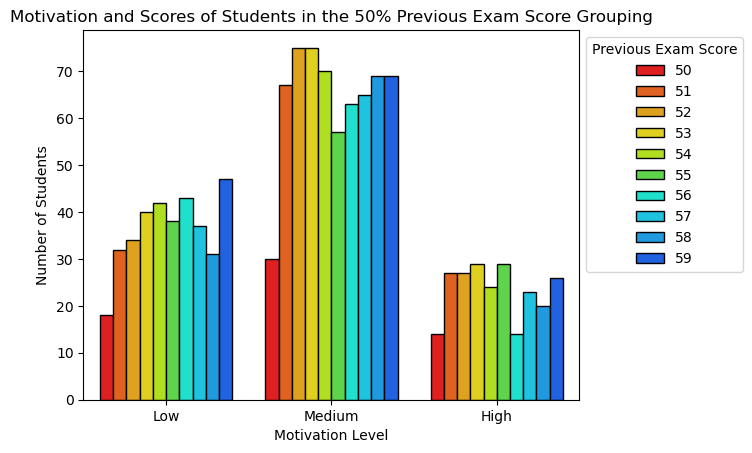

In [ ]:
fiftyScoreMotivationPlot = sns.countplot(data=fiftyScores, x='Motivation Level',
                                         palette=['#ff0000','#ff5800','#ffad00','#ffe900','#bfff00','#4ceb34','#00ffe5','#00d9ff','#00a1ff','#0058ff','#3500ff'], 
                                         edgecolor='black', 
                                         hue='Previous Exam Score')
fiftyScoreMotivationPlot.set(ylabel='Number of Students',
                             title='Motivation and Scores of Students in the 50% Previous Exam Score Grouping')
fiftyScoreMotivationPlot.legend(loc='upper left', bbox_to_anchor=(1,1), title='Previous Exam Score')
# Creating and styling a count plot of the 50% grouping of previous exam scores
display(fiftyScoreMotivationPlot)

Something interesting about this graph is that even though we are only looking at the students in the 50% grouping for the previous exam, the distribution between the three motivation levels is very similar to that of the whole population seen in the previous graph. I expected to see a greater proportion of students in the low 50% range (50,51,52) to have a tendency for high working motivation in the course, since they are the closest to failing. However, these students follow the same tendency as the rest of the students in that there are a majority of them within the medium motivation group, while the rest of them are quite evenly distributed between the low and high motivation groups. 
<br><br>
One thing to note is that the score that appears most frequently within the low motivation category is 59%, while the scores that appear most frequently in the medium motivation category is 53% and 54%. This somewhat follows the behaviour I had initially predicted where higher scores would have lower motivation and vice versa, but this isn't really that strong of an indicator of that. 
<br><br>
Now that we've investigated a relationship between previous exam score and motivation level, we can move on to investigating a relationship between those two variables and the students' final exam score. 

#### *Investigating Previous Score and Motivation's Impact on Final Exam Score*
First, I want to look at the relationship between a student's previous score and the final exam score. To do this, I'm going to generate a scatter plot using the dataframe. I'm also going to create a count plot with the x-axis as the previous exam score groupings, further subdivided into the final exam score groupings.

C:\Users\nsdiz\AppData\Local\Temp\ipykernel_23116\1033766043.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  scoresPlots.show()


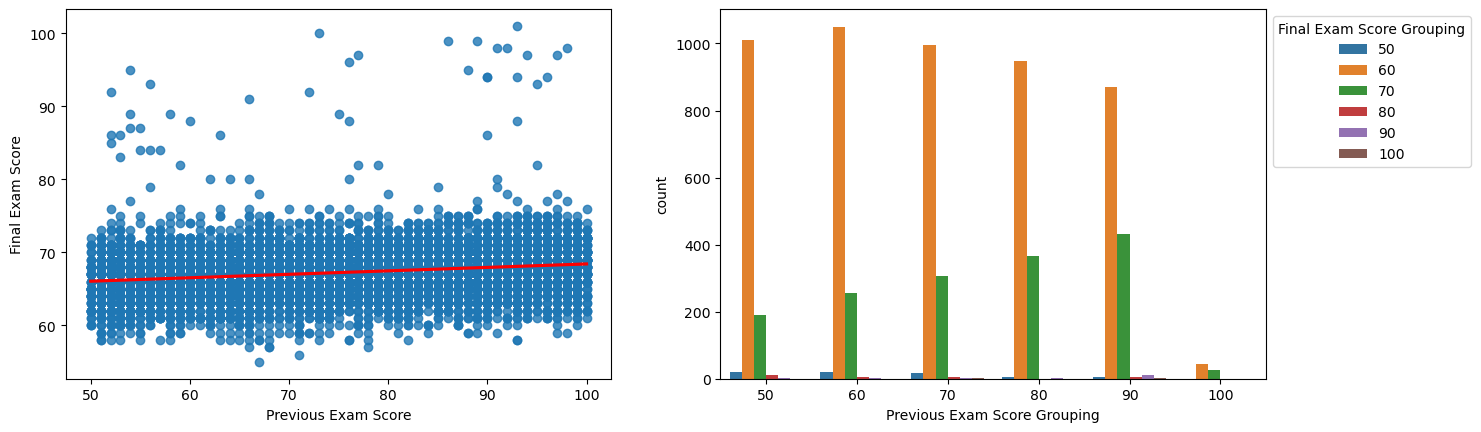

In [ ]:
# scoresScatterPlot.set()
scoresPlots, axes = plt.subplots(1,2)
axes[0] = sns.regplot(data=data, x='Previous Exam Score', y='Final Exam Score', line_kws=dict(color="red"), ax=axes[0])
axes[1] = sns.countplot(data=data, x='Previous Exam Score Grouping', hue='Final Exam Score Grouping', ax=axes[1])
# Creating and styling a scatter plot with regression line and a countplot modeling the relationship between previous exam scores and final exam scores

axes[1].legend(loc='upper left', bbox_to_anchor=(1,1), title='Final Exam Score Grouping')
scoresPlots.subplots_adjust(left=None, bottom=None, right=2, top=None,wspace=None, hspace=None)
# Positioning the legend of the count plot and the spacing around the two plots within the matplotlib figure

scoresPlots.show()

First looking at the scatter plot, the regression line shows a slight positive relationship between the previous exam score and the final exam score. We can conclude that if you score well on the previous exam, you will have a tendency to score well on the final exam as well. A similar observation to this is that the number of students within the 60% grouping for the final exam decreases as the previous exam scores increase.
<br><br>
Now looking at the bar graph, it is very apparent that most of the scores in all of the categories are within the 60% and 70% groupings. We can also see that generally, the higher you score on the previous exam, the more likely you are to score a 70% on the final exam. The number of people who score 70% on the final exam increases almost linearly as the previous exam score increases, except for when the previous exam score was 100%.
<br><br>
Since so much of the data is contained by the 60% and 70% groupings, it's really hard to see how the remaining student scores are distributed. I'm going to remove those two groupings from the data set before I graph it so we see only the 50%, 80%, 90%, and 100% groupings. This way, we can see how the student scores are distributed among these groupings. 

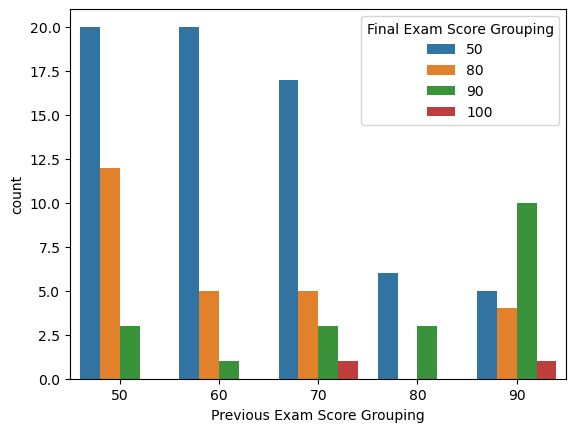

In [ ]:
trimmedFinalExamScores = data.loc[data.loc[:]['Final Exam Score Grouping'] != 60]
# Creating a view of the dataframe without the students who fall into the 60% final exam score grouping
trimmedFinalExamScores = trimmedFinalExamScores[trimmedFinalExamScores.loc[:]['Final Exam Score Grouping'] != 70]
# Removing the students who fall into the 70% final exam score grouping from the view created on the previous line

scoresBarPlot = sns.countplot(data=trimmedFinalExamScores, x='Previous Exam Score Grouping', hue='Final Exam Score Grouping')
# Creating a countplot modeling the relationship between previous exam scores and final exam scores without the 60% and 70% groups